focused on model selecting(screening). so far the random forest works the best (ave accuracy: 83%)
the screening should have higher confidence if each model has been optimized.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


/kaggle/input/heart-disease-uci/heart.csv


In [2]:
df = pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')
print(df.shape)
df.sample(10)

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
49,53,0,0,138,234,0,0,160,0,0.0,2,0,2,1
177,64,1,2,140,335,0,1,158,0,0.0,2,0,2,0
90,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1


```
age: The person's age in years
sex: The person's sex (1 = male, 0 = female)
cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
chol: The person's cholesterol measurement in mg/dl
fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
thalach: The person's maximum heart rate achieved
exang: Exercise induced angina (1 = yes; 0 = no)
oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
ca: The number of major vessels (0-3)
thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
target: Heart disease (0 = no, 1 = yes)
```

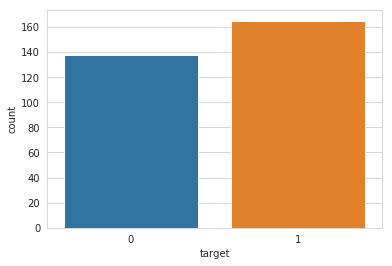

In [3]:
sns.countplot(df.target)

In [4]:
missing = df.isnull().sum()
missing_pct = missing/len(df)*100
missing_table = pd.DataFrame(data=[missing, missing_pct],
                            index=['missing','% missing'])
missing_table.T # convinient way to rotate the data

,missing,% missing
age,0.0,0.0
sex,0.0,0.0
cp,0.0,0.0
trestbps,0.0,0.0
chol,0.0,0.0
fbs,0.0,0.0
restecg,0.0,0.0
thalach,0.0,0.0
exang,0.0,0.0
oldpeak,0.0,0.0


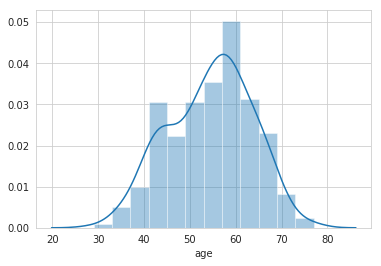

In [5]:
sns.distplot(df.age)

In [6]:
def evl_models(X_train, X_test, y_train, y_test):
    result = {}
    model_names = ['Logistric Regression', 'K Nearest Neighbors (K=5)', 'Random Forest', 'SVC', 'Linear SVC', 'Naive Bayes']
    models = [LogisticRegression(), KNeighborsClassifier(n_neighbors=5), RandomForestClassifier(n_estimators=100,max_depth=5,random_state=1),
             SVC(), LinearSVC(), GaussianNB()]

    for name,model in zip(model_names, models):
        m = model
        m.fit(X_train, y_train)
        y_pred = m.predict(X_test)
        score = metrics.accuracy_score(y_test, y_pred)
        print(name, 'accuracy score is: ', score)
        result[name] = score
    return result

In [7]:
result = {}
for i in range(1,10):
    X, y = df.drop('target', axis=1), df.target
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
    print('*'*10,' trial {}'.format(i))
    r = evl_models(X_train, X_test, y_train, y_test)
    for k in r:
        print(r[k], k)
        if k in result:
            result[k].append(r[k])
        else:
            result[k] = [r[k]]
        

**********  trial 1
Logistric Regression accuracy score is:  0.8688524590163934
K Nearest Neighbors (K=5) accuracy score is:  0.5901639344262295
Random Forest accuracy score is:  0.7868852459016393
SVC accuracy score is:  0.5737704918032787
Linear SVC accuracy score is:  0.8524590163934426
Naive Bayes accuracy score is:  0.7704918032786885
0.8688524590163934 Logistric Regression
0.5901639344262295 K Nearest Neighbors (K=5)
0.7868852459016393 Random Forest
0.5737704918032787 SVC
0.8524590163934426 Linear SVC
0.7704918032786885 Naive Bayes
**********  trial 2
Logistric Regression accuracy score is:  0.7704918032786885
K Nearest Neighbors (K=5) accuracy score is:  0.5737704918032787
Random Forest accuracy score is:  0.8032786885245902
SVC accuracy score is:  0.5901639344262295
Linear SVC accuracy score is:  0.639344262295082
Naive Bayes accuracy score is:  0.7049180327868853
0.7704918032786885 Logistric Regression
0.5737704918032787 K Nearest Neighbors (K=5)
0.8032786885245902 Random Fore

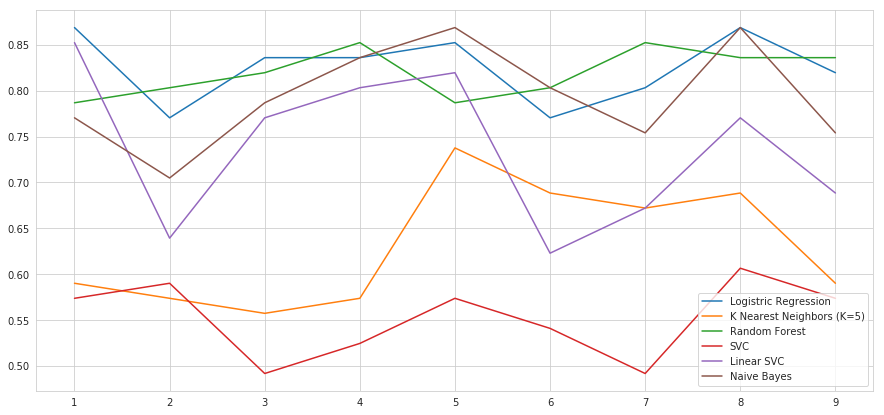

In [8]:
plt.figure(figsize=(15,7))
for k in result:
    sns.lineplot(x=range(1,10), y=result[k], label=k)
# plt.legend

In [9]:
result = {}
for i in range(1,10):
    X, y = df.drop('target', axis=1), df.target
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y)
    print('*'*10,' trial {}'.format(i))
    r = evl_models(X_train, X_test, y_train, y_test)
    for k in r:
        print(r[k], k)
        if k in result:
            result[k].append(r[k])
        else:
            result[k] = [r[k]]

**********  trial 1
Logistric Regression accuracy score is:  0.7704918032786885
K Nearest Neighbors (K=5) accuracy score is:  0.5901639344262295
Random Forest accuracy score is:  0.7704918032786885
SVC accuracy score is:  0.5245901639344263
Linear SVC accuracy score is:  0.7213114754098361
Naive Bayes accuracy score is:  0.8032786885245902
0.7704918032786885 Logistric Regression
0.5901639344262295 K Nearest Neighbors (K=5)
0.7704918032786885 Random Forest
0.5245901639344263 SVC
0.7213114754098361 Linear SVC
0.8032786885245902 Naive Bayes
**********  trial 2
Logistric Regression accuracy score is:  0.8524590163934426
K Nearest Neighbors (K=5) accuracy score is:  0.6885245901639344
Random Forest accuracy score is:  0.8524590163934426
SVC accuracy score is:  0.5573770491803278
Linear SVC accuracy score is:  0.5573770491803278
Naive Bayes accuracy score is:  0.8524590163934426
0.8524590163934426 Logistric Regression
0.6885245901639344 K Nearest Neighbors (K=5)
0.8524590163934426 Random For

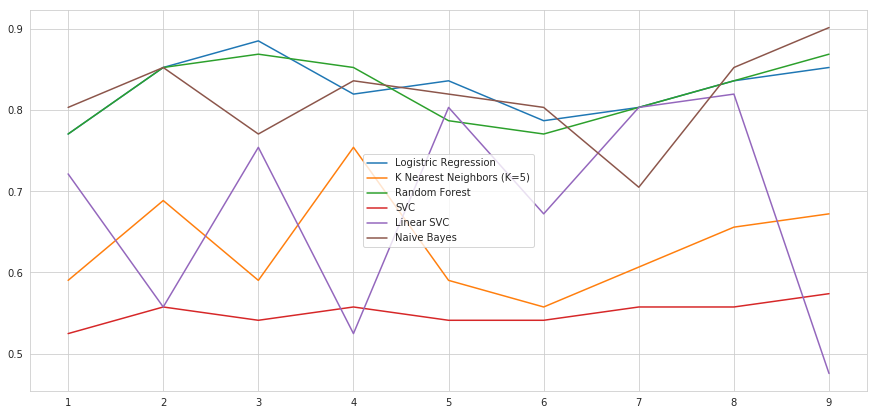

In [10]:
plt.figure(figsize=(15,7))
for k in result:
    sns.lineplot(x=range(1,10), y=result[k], label=k)

In [11]:
def evl_models_10fold(X,y):
    result = []
    model_names = ['Logistric Regression', 'K Nearest Neighbors (K=5)', 'Random Forest', 'SVC', 'Linear SVC', 'Naive Bayes']
    models = [LogisticRegression(), KNeighborsClassifier(n_neighbors=5), RandomForestClassifier(n_estimators=100,max_depth=5,random_state=1),
             SVC(), LinearSVC(), GaussianNB()]

    for name,model in zip(model_names, models):
        m = model
        scores = cross_val_score(m, X,y, cv=10,scoring='accuracy')
        print(name, 'accuracy score is: ', scores)
        result.append(scores)
    return zip(model_names,result)

Logistric Regression accuracy score is:  [0.87096774 0.80645161 0.83870968 0.87096774 0.90322581 0.8
 0.83333333 0.9        0.68965517 0.72413793]
K Nearest Neighbors (K=5) accuracy score is:  [0.70967742 0.67741935 0.5483871  0.61290323 0.67741935 0.5
 0.83333333 0.63333333 0.5862069  0.75862069]
Random Forest accuracy score is:  [0.90322581 0.80645161 0.83870968 0.93548387 0.90322581 0.73333333
 0.76666667 0.86666667 0.72413793 0.82758621]
SVC accuracy score is:  [0.58064516 0.58064516 0.5483871  0.5483871  0.5483871  0.53333333
 0.53333333 0.53333333 0.55172414 0.55172414]
Linear SVC accuracy score is:  [0.83870968 0.67741935 0.74193548 0.61290323 0.87096774 0.8
 0.66666667 0.76666667 0.72413793 0.5862069 ]
Naive Bayes accuracy score is:  [0.80645161 0.80645161 0.87096774 0.87096774 0.80645161 0.7
 0.86666667 0.8        0.75862069 0.68965517]
10 Logistric Regression [0.87096774 0.80645161 0.83870968 0.87096774 0.90322581 0.8
 0.83333333 0.9        0.68965517 0.72413793]
10 K Nearest

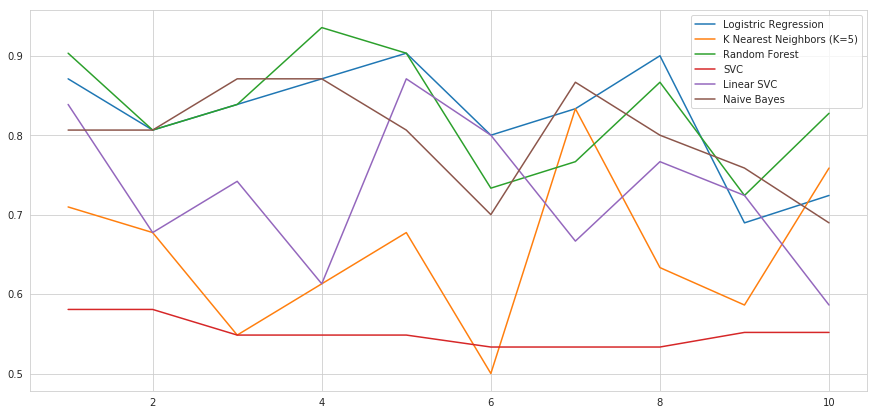

In [12]:
X, y = df.drop('target', axis=1), df.target
res = evl_models_10fold(X,y)
plt.figure(figsize=(15,7))
for n, r in res:
    print(len(r), n, r)
    sns.lineplot(x=range(1,11), y=r, label=n)

Logistric Regression accuracy score is:  [0.87096774 0.80645161 0.83870968 0.87096774 0.90322581 0.8
 0.83333333 0.9        0.68965517 0.72413793]
K Nearest Neighbors (K=5) accuracy score is:  [0.70967742 0.67741935 0.5483871  0.61290323 0.67741935 0.5
 0.83333333 0.63333333 0.5862069  0.75862069]
Random Forest accuracy score is:  [0.90322581 0.80645161 0.83870968 0.93548387 0.90322581 0.73333333
 0.76666667 0.86666667 0.72413793 0.82758621]
SVC accuracy score is:  [0.58064516 0.58064516 0.5483871  0.5483871  0.5483871  0.53333333
 0.53333333 0.53333333 0.55172414 0.55172414]
Linear SVC accuracy score is:  [0.87096774 0.83870968 0.87096774 0.61290323 0.87096774 0.66666667
 0.56666667 0.86666667 0.68965517 0.65517241]
Naive Bayes accuracy score is:  [0.80645161 0.80645161 0.87096774 0.87096774 0.80645161 0.7
 0.86666667 0.8        0.75862069 0.68965517]
0.8237449017426769
0.6537300704486466
0.8305487578791249
0.5509899888765295
0.7509343715239154
0.7976232851316277
[['Random Forest', 0.

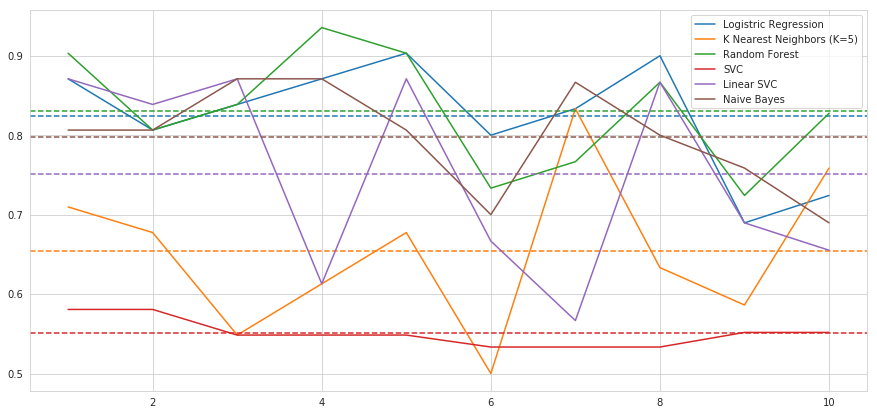

In [13]:
X, y = df.drop('target', axis=1), df.target
res = evl_models_10fold(X,y)
# print(list(res))
res = list(res)
colors = sns.color_palette() # seaborn's default 10 colors list
plt.figure(figsize=(15,7))
for i, t in enumerate(res):
    n, r = t
    sns.lineplot(x=range(1,11), y=r, label=n)
    print(r.mean())
    plt.axhline(y=r.mean(), ls='--', color=colors[i])
temp = [[i,j.mean()] for i,j in res]
temp.sort(key=lambda x: -x[1])
print(temp)
temp = pd.DataFrame(temp, columns=['Model','Mean Accuracy'])
print(temp)
# plt.show()

So far Random forest perform the best. Let's see how it goes with TensorFlow

Random Forest accuracy score is:  0.8311688311688312
TensorFlow accuracy score is:  0.8311688311688312
confusion_matrix: 
[[24 11]
 [ 2 40]], 
precision_score: 0.7843137254901961, recall_score: 0.9523809523809523, f1_score: 0.8602150537634408, cohen_kappa_score: 0.6520681265206814
Random Forest accuracy score is:  0.881578947368421
TensorFlow accuracy score is:  0.8552631578947368
confusion_matrix: 
[[26  9]
 [ 2 39]], 
precision_score: 0.8125, recall_score: 0.9512195121951219, f1_score: 0.8764044943820225, cohen_kappa_score: 0.7043847241867044
Random Forest accuracy score is:  0.8133333333333334
TensorFlow accuracy score is:  0.8133333333333334
confusion_matrix: 
[[25  9]
 [ 5 36]], 
precision_score: 0.8, recall_score: 0.8780487804878049, f1_score: 0.8372093023255814, cohen_kappa_score: 0.6195652173913043
Random Forest accuracy score is:  0.8133333333333334
TensorFlow accuracy score is:  0.7866666666666666
confusion_matrix: 
[[28  6]
 [10 31]], 
precision_score: 0.8378378378378378, re

(0, 1)

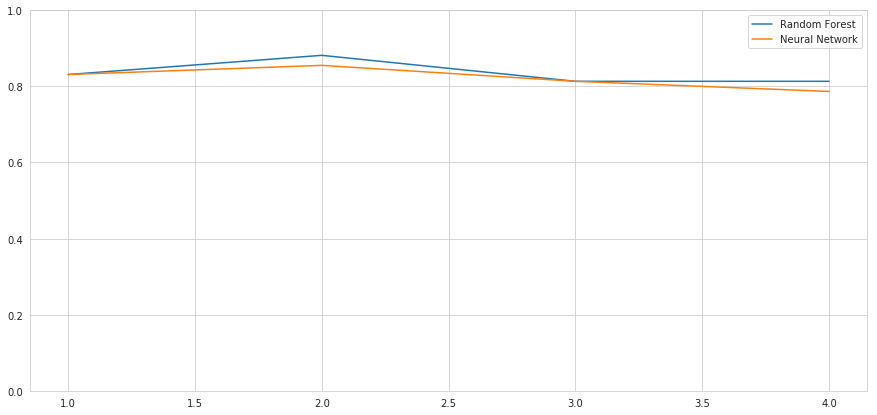

In [14]:
from keras.utils.np_utils import to_categorical
X, y = df.drop('target', axis=1), df.target
kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=2)
rfr, nnr = [], []
for sub_train, sub_test in kfold.split(X, y):
    yy = y #to_categorical(y.copy(), num_classes = 2)
    scaler = StandardScaler().fit(X.iloc[sub_train])
    XX = scaler.transform(X)
#     print(XX[:5])
    # Random Forest for comparison
    rf = RandomForestClassifier(n_estimators=100,max_depth=5,random_state=1)
    rf.fit(XX[sub_train], yy[sub_train])
    y_pred = rf.predict(XX[sub_test])
#     print(y_pred[:5])
    score = metrics.accuracy_score(yy[sub_test], y_pred)
    rfr.append(score)
    print('Random Forest accuracy score is: ', score)
    
    # TensorFlow
    model = Sequential()
    # Add an input layer 
    model.add(Dense(15, activation='relu', input_shape=(13,)))
    # Add one hidden layer 
    model.add(Dense(8, activation='relu'))
    # Add an output layer 
    model.add(Dense(1, activation='sigmoid'))
#     print(model.output_shape, model.summary(), model.get_config(), model.get_weights())
    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    model.fit(XX[sub_train], yy[sub_train], epochs=20, batch_size=5, verbose=0)
    
    y_pred = model.predict(XX[sub_test]).round()
#     print(y_pred[:5])
    score = metrics.accuracy_score(yy[sub_test], y_pred)
    nnr.append(score)
    print('TensorFlow accuracy score is: ', score)
    confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score = metrics.confusion_matrix(yy[sub_test], y_pred), metrics.precision_score(yy[sub_test], y_pred), metrics.recall_score(yy[sub_test], y_pred), metrics.f1_score(yy[sub_test], y_pred), metrics.cohen_kappa_score(yy[sub_test], y_pred)
    print('confusion_matrix: \n{}, \nprecision_score: {}, recall_score: {}, f1_score: {}, cohen_kappa_score: {}'.format(confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score))
    
plt.figure(figsize=(15,7))    
sns.lineplot(x=range(1,len(rfr)+1), y=rfr, label='Random Forest')
sns.lineplot(x=range(1,len(rfr)+1), y=nnr, label='Neural Network')
plt.ylim(0,1)